In [1]:
from collections import defaultdict, Counter
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
# create OAuth token -> https://docs.cachethq.io/docs/github-oauth-token
# assign it to env variable::
# >> export GITHUB_ACCESS_TOKEN=<your token>
token = os.getenv('GITHUB_ACCESS_TOKEN')
org = 'nss-data-analytics-01'
instructors = ['MaryLvV', 'taylorperkins', 'selamtekie']

headers = {"Authorization": f"token {token}"}

In [3]:
dummy_link = '<https://api.github.com/organizations/52509130/repos?page=8>; rel="prev", <https://api.github.com/organizations/52509130/repos?page=1>; rel="first"'

In [4]:
url_ptrn = re.compile('<(.*?)>;\s')
url_ptrn.findall(dummy_link)

['https://api.github.com/organizations/52509130/repos?page=8',
 'https://api.github.com/organizations/52509130/repos?page=1']

In [5]:
rel_ptrn = re.compile(';\srel="(.*?)"')
rel_ptrn.findall(dummy_link)

['prev', 'first']

In [6]:
def get_next_url(headers_link):
    rels = rel_ptrn.findall(headers_link)
    
    if 'next' in rels:
        next_pos = rels.index('next')
        
        urls = url_ptrn.findall(headers_link)
        return urls[next_pos]

In [7]:
url = f'https://api.github.com/orgs/{org}/repos'
repos = []

while True:
    print(f'Getting {url}')
    next_repos = requests.get(url, headers=headers)
    repos.extend(next_repos.json())
    
    # support for pagination if availablej
    next_url = get_next_url(next_repos.headers.get('Link', ''))
    if next_url is not None:
        url = next_url
    else:
        break

Getting https://api.github.com/orgs/nss-data-analytics-01/repos
Getting https://api.github.com/organizations/52509130/repos?page=2
Getting https://api.github.com/organizations/52509130/repos?page=3
Getting https://api.github.com/organizations/52509130/repos?page=4
Getting https://api.github.com/organizations/52509130/repos?page=5
Getting https://api.github.com/organizations/52509130/repos?page=6
Getting https://api.github.com/organizations/52509130/repos?page=7
Getting https://api.github.com/organizations/52509130/repos?page=8
Getting https://api.github.com/organizations/52509130/repos?page=9


In [8]:
contributers_per_repo = defaultdict(Counter)

print(f"{'NAME':<100} | PCT")
print("="*108)

count = len(repos)
for ind, repo in enumerate(repos):
    
    repo_name = repo['full_name']
    print(f"{repo_name:<100} | {round(ind / 246 * 100, 3):<3}%")
    
    contribute_url = repo['contributors_url']
    
    contributors_response = requests.get(contribute_url, headers=headers)
    if contributors_response.status_code != 200:
        print(contributors_response.status_code)
        break
        
    contributors = contributors_response.json()
    for contributor in contributors:
        contributers_per_repo[repo_name][contributor['login']] += contributor['contributions']

NAME                                                                                                 | PCT
nss-data-analytics-01/monthly-searches-nashville.gov                                                 | 0.0%
nss-data-analytics-01/dq1-monthly-searches-tammscaley73                                              | 0.407%
nss-data-analytics-01/dq1-monthly-searches-dpowell89                                                 | 0.813%
nss-data-analytics-01/dq1-monthly-searches-rossdingwall                                              | 1.22%
nss-data-analytics-01/dq1-monthly-searches-ukrainian-serge                                           | 1.626%
nss-data-analytics-01/dq1-monthly-searches-bryanc007                                                 | 2.033%
nss-data-analytics-01/dq1-monthly-searches-RakshandaKaukab05                                         | 2.439%
nss-data-analytics-01/dq1-monthly-searches-samlawson1                                                | 2.846%
nss-data-analyti

nss-data-analytics-01/charlotte-yelp-royal-frogs                                                     | 29.675%
nss-data-analytics-01/charlotte-yelp-flying-tigers                                                   | 30.081%
nss-data-analytics-01/charlotte-yelp-fast-dragons                                                    | 30.488%
nss-data-analytics-01/charlotte-yelp-giant-sparrows                                                  | 30.894%
nss-data-analytics-01/charlotte-yelp-new-magicians                                                   | 31.301%
nss-data-analytics-01/charlotte-yelp-happy-spiders                                                   | 31.707%
nss-data-analytics-01/charlotte-yelp-grim-mystics                                                    | 32.114%
nss-data-analytics-01/GDP-and-Internet-Usage                                                         | 32.52%
nss-data-analytics-01/gdp-and-internet-usage-ckinzer05                                               | 32.927%
ns

nss-data-analytics-01/percent-comp-increase-loafers                                                  | 59.756%
nss-data-analytics-01/percent-comp-increase-wingtips                                                 | 60.163%
nss-data-analytics-01/percent-comp-increase-oxfords                                                  | 60.569%
nss-data-analytics-01/percent-comp-increase-sandals                                                  | 60.976%
nss-data-analytics-01/percent-comp-increase-sneakers                                                 | 61.382%
nss-data-analytics-01/percent-comp-increase-mules                                                    | 61.789%
nss-data-analytics-01/percent-comp-increase-huarache                                                 | 62.195%
nss-data-analytics-01/power-bi-workshop                                                              | 62.602%
nss-data-analytics-01/python-assessment                                                              | 63.008%
n

nss-data-analytics-01/power-bi-workshop-jraiaromano                                                  | 89.837%
nss-data-analytics-01/power-bi-workshop-BryanC007                                                    | 90.244%
nss-data-analytics-01/power-bi-workshop-samlawson1                                                   | 90.65%
nss-data-analytics-01/power-bi-workshop-PBusienei                                                    | 91.057%
nss-data-analytics-01/power-bi-workshop-dpowell89                                                    | 91.463%
nss-data-analytics-01/power-bi-workshop-ukrainian-serge                                              | 91.87%
nss-data-analytics-01/power-bi-workshop-Terrymain2019                                                | 92.276%
nss-data-analytics-01/power-bi-workshop-vbarisic                                                     | 92.683%
nss-data-analytics-01/power-bi-workshop-ssimseksefa                                                  | 93.089%
nss

In [9]:
appearances = Counter([name for contrib_info in contributers_per_repo.values() for name in contrib_info.keys()])
print(appearances)

Counter({'MaryLvV': 245, 'taylorperkins': 29, 'styler1914': 29, 'sarah-weatherbee': 12, 'samlawson1': 11, 'dspaulding94': 11, 'alextrambley': 11, 'saifislam1': 11, 'nateallen93': 11, 'Djtvdoug': 11, 'tammscaley73': 10, 'JLBoyer55': 10, 'ssimseksefa': 10, 'vbarisic': 10, 'dpowell89': 9, 'BryanC007': 9, 'jraiaromano': 9, 'tgfbeta1017': 9, 'ckinzer05': 9, 'jcjmcdonald': 9, 'SethR2025': 9, 'jrgood174': 9, 'EmilaStevenson': 9, 'rossdingwall': 8, 'Cmd931': 8, 'RakshandaKaukab05': 8, 'mcvholloway': 8, 'ukrainian-serge': 7, 'PBusienei': 4, 'Terrymain2019': 2, 'juliakimchung': 1, 'mcgee-analytics': 1})


In [10]:
appearances_df = pd.DataFrame(data=[(key, val) for key, val in appearances.items()], columns=['name', 'count']) \
    .sort_values(by='count', ascending=False)

appearances_df = appearances_df[~appearances_df['name'].isin(instructors)]

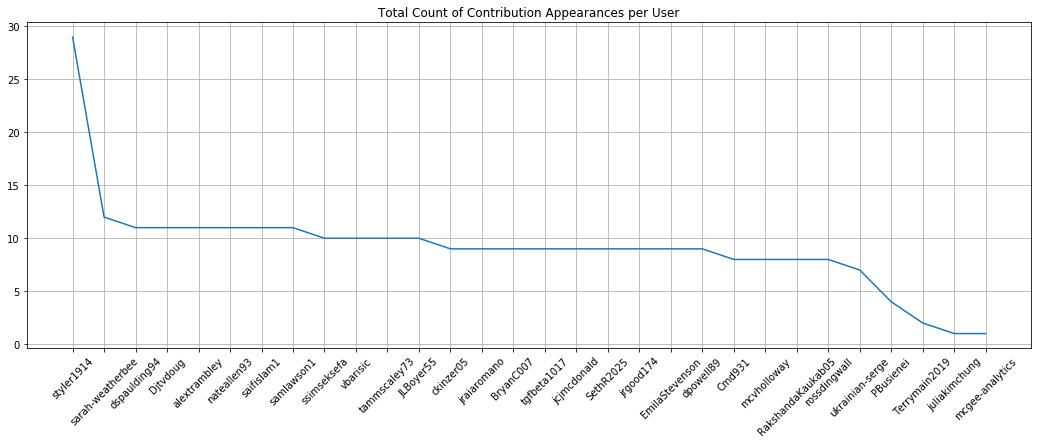

In [11]:
f, ax = plt.subplots(figsize=(18, 6))

ax.set_title('Total Count of Contribution Appearances per User')

ax.grid()
ax.plot(appearances_df['name'], appearances_df['count'])

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
plt.savefig('appearance_count.png')

In [12]:
contribution_count = [(name, count) for contrib_info in contributers_per_repo.values() for name, count in contrib_info.items()]

contribution_count_df = pd.DataFrame(data=contribution_count, columns=['name', 'count']) \
    .groupby('name') \
    ['count'].sum() \
    .to_frame() \
    .reset_index() \
    .sort_values(by='count', ascending=False)

contribution_count_df = contribution_count_df[~contribution_count_df['name'].isin(instructors)]

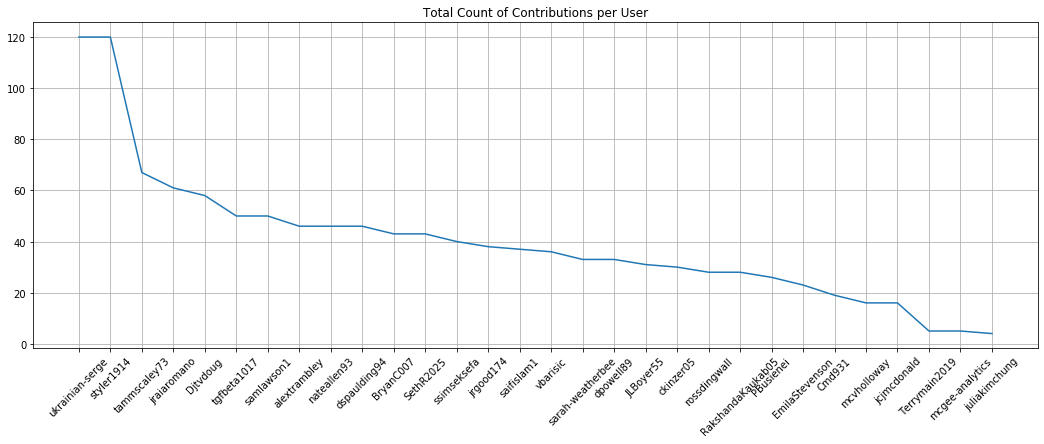

In [13]:
f, ax = plt.subplots(figsize=(18, 6))

ax.set_title('Total Count of Contributions per User')

ax.grid()

ax.plot(contribution_count_df['name'], contribution_count_df['count'])

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
plt.savefig('contribution_count.png')

In [14]:
repo_count = list()

for member in requests.get(f'https://api.github.com/orgs/{org}/members', headers=headers).json():
    
    name = member['login']
    repos = []
    url = f'https://api.github.com/users/{name}/repos'
    
    while True:
        print(f'Getting {url}')
        next_repos = requests.get(url, headers=headers)
        repos.extend(next_repos.json())

        next_url = get_next_url(next_repos.headers.get('Link', ''))
        if next_url is not None:
            url = next_url
        else:
            break
    
    repo_count.append((name, len(repos)))

Getting https://api.github.com/users/alextrambley/repos
Getting https://api.github.com/users/BryanC007/repos
Getting https://api.github.com/users/ckinzer05/repos
Getting https://api.github.com/users/Cmd931/repos
Getting https://api.github.com/users/Djtvdoug/repos
Getting https://api.github.com/users/dpowell89/repos
Getting https://api.github.com/users/dspaulding94/repos
Getting https://api.github.com/users/EmilaStevenson/repos
Getting https://api.github.com/users/jcjmcdonald/repos
Getting https://api.github.com/users/JLBoyer55/repos
Getting https://api.github.com/users/jraiaromano/repos
Getting https://api.github.com/users/jrgood174/repos
Getting https://api.github.com/users/MaryLvV/repos
Getting https://api.github.com/user/8145655/repos?page=2
Getting https://api.github.com/users/nateallen93/repos
Getting https://api.github.com/users/PBusienei/repos
Getting https://api.github.com/users/RakshandaKaukab05/repos
Getting https://api.github.com/users/rossdingwall/repos
Getting https://api.

In [16]:
repo_count_df = pd.DataFrame(repo_count, columns=['name', 'count']) \
    .sort_values(by='count', ascending=False)

repo_count_df = repo_count_df[~repo_count_df['name'].isin(instructors)]

has_repo = repo_count_df[repo_count_df['count'] >= 1]
does_not_have_repo = repo_count_df[repo_count_df['count'] == 0]

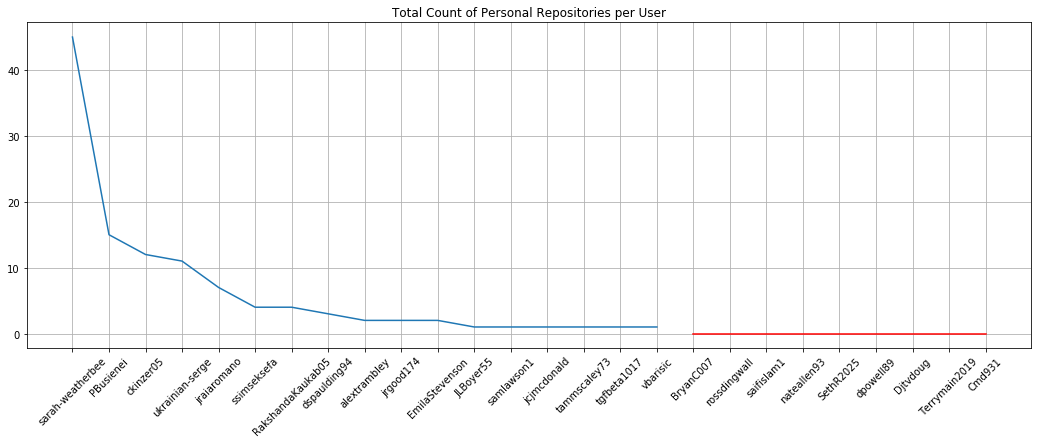

In [17]:
f, ax = plt.subplots(figsize=(18, 6))

ax.set_title('Total Count of Personal Repositories per User')

ax.grid()

ax.plot(has_repo['name'], has_repo['count'])
ax.plot(does_not_have_repo['name'], does_not_have_repo['count'], c='red')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
plt.savefig('personal_repo_count.png')